### Exercise: Classification of types of rice

This exercise use the dataset provided at the following [link]
(https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik).

You should first install the ucimlrepo (*pip install ucimlrepo*).

This example uses the 'Import example' source code.

### Check dataset

In [422]:
import pandas as pd
from scipy.io import arff

# code
arff_file = arff.loadarff('./Rice_Cammeo_Osmancik.arff')

df = pd.DataFrame(arff_file[0])

df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,b'Cammeo'
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,b'Cammeo'
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,b'Cammeo'
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,b'Cammeo'
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,b'Cammeo'


Check the type of the last column. It is a byte-encoded string. Let's encode it with a standard text encoding scheme, such as UTF-8.

In [423]:
df['Class'] = df['Class'].str.decode('utf-8')

Build the dataset and the vector of labels.

In [424]:
X = df.loc[:, df.columns[:-1]]
y = df.Class

What if we need to encode labels?

In [425]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)

In [426]:
print(y[:10])

[0 0 0 0 0 0 0 0 0 0]


In [427]:
print(le.inverse_transform(y[:10]))

['Cammeo' 'Cammeo' 'Cammeo' 'Cammeo' 'Cammeo' 'Cammeo' 'Cammeo' 'Cammeo'
 'Cammeo' 'Cammeo']


### Simple hold out (training-test only)

In [428]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

import seaborn as sns

### Step 1: prepare dataset

In [429]:
# train_test proportion
test_proportion = 0.2

x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = test_proportion,
                                                    shuffle=True)

# do we need to set the random state?

### Step 2: create models

In [430]:
lr = LogisticRegression()
per = Perceptron()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
rf = RandomForestClassifier()

### Step 3: train the models

In [431]:
lr.fit(x_train, y_train)
per.fit(x_train, y_train)
knn.fit(x_train, y_train)
dt.fit(x_train, y_train)
svc.fit(x_train, y_train)
rf.fit(x_train, y_train)

print("")

### Step 4: test the models

In [432]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [433]:
lr_pred = lr.predict(x_test)
per_pred = per.predict(x_test)
knn_pred = knn.predict(x_test)
dt_pred = dt.predict(x_test)
svc_pred = svc.predict(x_test)
rf_pred = rf.predict(x_test)

In [434]:
lr_f1 = f1_score(lr_pred, y_test)
per_f1 = f1_score(per_pred, y_test)
knn_f1 = f1_score(knn_pred, y_test)
dt_f1 = f1_score(dt_pred, y_test)
svc_f1 = f1_score(svc_pred, y_test)
rf_f1 = f1_score(rf_pred, y_test)

f1_results = [lr_f1, per_f1, knn_f1, dt_f1, svc_f1, rf_f1]
print(f1_results)

[0.953810623556582, 0.0, 0.9113636363636364, 0.9181084198385236, 0.9007803790412486, 0.9466357308584686]


Let's see the results on a plot

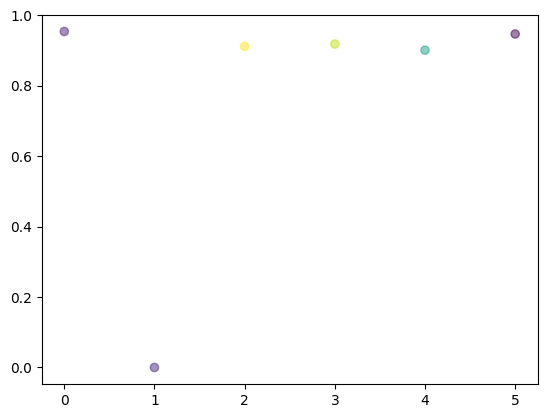

In [435]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(range(6), f1_results, c = np.random.rand(6), alpha=0.5)

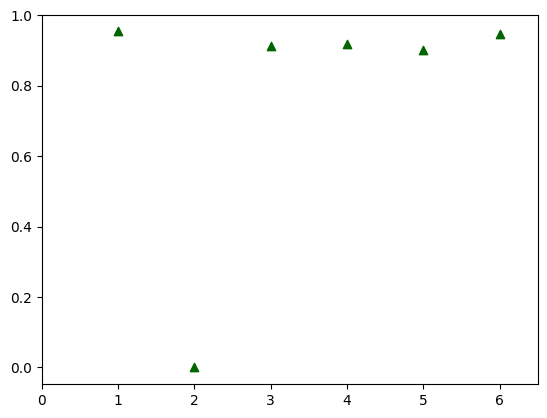

In [436]:
import matplotlib.pyplot as plt
fig = plt.figure() #Step 2
ax = fig.add_subplot(111) #Step 3
ax.scatter([1, 2, 3, 4, 5, 6],
           f1_results,
          color= 'darkgreen',
          marker= '^' )
ax.set_xlim(0, 6.5)
ax.label_outer
#plt.savefig('foo.png' ) #Step 5
plt.show() #Step 6

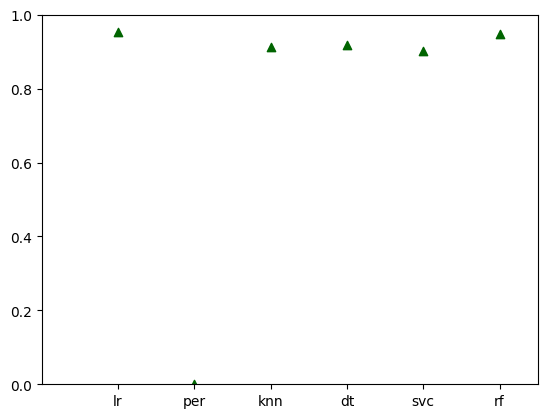

In [437]:
import matplotlib.pyplot as plt

ticks = [1, 2, 3, 4, 5, 6]
labels = ["lr", "per", "knn", "dt", "svc", "rf"]

fig = plt.figure() #Step 2
ax = fig.add_subplot(111) #Step 3
ax.scatter(ticks,
           f1_results,
          color= 'darkgreen',
          marker= '^' )
ax.set_ylim(0, 1)
ax.set_xlim(0, 6.5)
ax.set_xticks(ticks, labels)
plt.savefig('foo2.png' ) #Step 5
plt.show() #Step 6

### "Simple" K-fold cross validation (no test)

In [438]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

num_folds = 10

k_fold = KFold(n_splits = num_folds, shuffle = True)

# do we need random seed?

In [439]:
cv_lr = cross_validate(estimator = lr, 
                       X = X, 
                       y = y, 
                       cv = k_fold, 
                       scoring = ('f1_macro'), 
                       return_train_score = False)

cv_per = cross_validate(estimator = per, X = X, y = y, cv = k_fold, scoring = ('f1_macro'), return_train_score = False)
cv_knn = cross_validate(estimator = knn, X = X, y = y, cv = k_fold, scoring = ('f1_macro'), return_train_score = False)
cv_dt = cross_validate(estimator = dt, X = X, y = y, cv = k_fold, scoring = ('f1_macro'), return_train_score = False)
cv_svc = cross_validate(estimator = svc, X = X, y = y, cv = k_fold, scoring = ('f1_macro'), return_train_score = False)
cv_rf = cross_validate(estimator = rf, X = X, y = y, cv = k_fold, scoring = ('f1_macro'), return_train_score = False)

/opt/homebrew/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [440]:
import pandas as pd

f1_perf = pd.DataFrame({
  'Model': ['lr'] * num_folds + ['per'] * num_folds + ['knn'] * num_folds + ['dt'] * num_folds + ['svc'] * num_folds + ['rf'] * num_folds,
  'Performance': list(cv_lr['test_score']) + list(cv_per['test_score']) + list(cv_knn['test_score']) + list(cv_dt['test_score']) + list(cv_svc['test_score'])+ list(cv_rf['test_score'])
})

# we can see that the variance in the 
print(f1_perf)

   Model  Performance
0     lr     0.899080
1     lr     0.952517
2     lr     0.926509
3     lr     0.933413
4     lr     0.932598
5     lr     0.927789
6     lr     0.927991
7     lr     0.932715
8     lr     0.918086
9     lr     0.941028
10   per     0.286517
11   per     0.313514
12   per     0.289799
13   per     0.789977
14   per     0.367110
15   per     0.311031
16   per     0.316432
17   per     0.356419
18   per     0.358586
19   per     0.369205
20   knn     0.880829
21   knn     0.890542
22   knn     0.864316
23   knn     0.902497
24   knn     0.896609
25   knn     0.887425
26   knn     0.895987
27   knn     0.871717
28   knn     0.894270
29   knn     0.889652
30    dt     0.875871
31    dt     0.853785
32    dt     0.869483
33    dt     0.885563
34    dt     0.918259
35    dt     0.893659
36    dt     0.865842
37    dt     0.888848
38    dt     0.889207
39    dt     0.890934
40   svc     0.872297
41   svc     0.883024
42   svc     0.868651
43   svc     0.879859
44   svc  

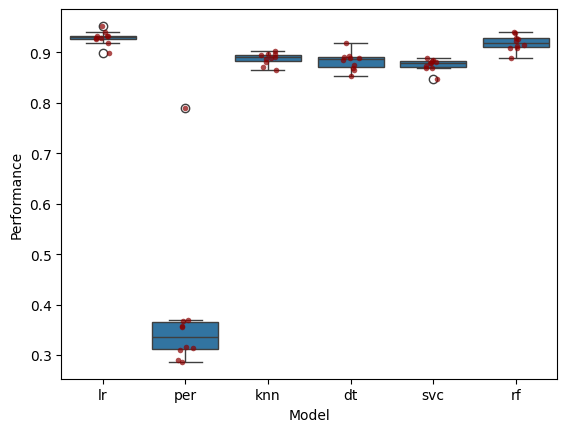

In [441]:
fig = plt.figure() #Step 2
ax = fig.add_subplot(111) #Step 3
sns.boxplot(data = f1_perf, x='Model', y='Performance')
sns.stripplot(data = f1_perf, x='Model', y='Performance', color='darkred', size=4, alpha=0.7)

#ax.set(ylim = (0.5, 1.0))

plt.show()

In [442]:
from scipy.stats import wilcoxon

model_1 = "dt"
model_2 = "per"

# perform Wilcoxon signed-rank test
wilcoxon_stat, wilcoxon_pval = wilcoxon(f1_perf[f1_perf['Model'] == model_1]['Performance'], 
                                        f1_perf[f1_perf['Model'] == model_2]['Performance'], 
                                        alternative = 'two-sided', 
                                        zero_method = 'wilcox', 
                                        correction = True,
                                        mode = 'approx')


In [443]:
# display test results
print("Wilcoxon Signed-Rank Test:")
print(f"p-value: {wilcoxon_pval}")


Wilcoxon Signed-Rank Test:
p-value: 0.005921537024148715
